In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
from datetime import datetime
from itertools import product
from matplotlib.gridspec import GridSpec

In [20]:
machine_names = ['A', 'B', 'C', 'D']
time_stamps = pd.date_range(start='18/5/2022', end='23/5/2022', freq='1D').values
index = pd.MultiIndex.from_product([machine_names, time_stamps], names=["machine", "timestamp"])
index

MultiIndex([('A', '2022-05-18'),
            ('A', '2022-05-19'),
            ('A', '2022-05-20'),
            ('A', '2022-05-21'),
            ('A', '2022-05-22'),
            ('A', '2022-05-23'),
            ('B', '2022-05-18'),
            ('B', '2022-05-19'),
            ('B', '2022-05-20'),
            ('B', '2022-05-21'),
            ('B', '2022-05-22'),
            ('B', '2022-05-23'),
            ('C', '2022-05-18'),
            ('C', '2022-05-19'),
            ('C', '2022-05-20'),
            ('C', '2022-05-21'),
            ('C', '2022-05-22'),
            ('C', '2022-05-23'),
            ('D', '2022-05-18'),
            ('D', '2022-05-19'),
            ('D', '2022-05-20'),
            ('D', '2022-05-21'),
            ('D', '2022-05-22'),
            ('D', '2022-05-23')],
           names=['machine', 'timestamp'])

In [19]:
df = pd.DataFrame(np.random.normal(loc=50.0, scale=3.0, size=(index.shape[0])), index=index, columns=['Temperature'])
df

Temperature
machine timestamp              
A       2022-05-18    53.028454
        2022-05-19    49.919714
        2022-05-20    45.272221
        2022-05-21    54.071962
        2022-05-22    48.770945
        2022-05-23    47.086152
B       2022-05-18    40.010756
        2022-05-19    48.589892
        2022-05-20    50.255219
        2022-05-21    54.791848
        2022-05-22    57.550185
        2022-05-23    51.312463
C       2022-05-18    49.108235
        2022-05-19    52.731533
        2022-05-20    54.895821
        2022-05-21    52.383910
        2022-05-22    47.047561
        2022-05-23    48.780832
D       2022-05-18    51.033024
        2022-05-19    52.684855
        2022-05-20    49.751241
        2022-05-21    51.425676
        2022-05-22    50.267590
        2022-05-23    49.722722

In [83]:
def to_bins(data, bin_width=10, floor=None):
    # check bounds
    if floor is None:
        lower_bound = np.ceil(np.min(data))
    else:
        lower_bound = floor       
    upper_bound = np.max(data) 
    bounds = [lower_bound + i * bin_width for i in range(np.ceil((upper_bound-lower_bound) / bin_width).astype(int))]
    
    # build bin dictionary: (lb, ub) -> set
    bins = {(bounds[i], bounds[i+1]): [] for i in range(len(bounds)-1)}
    bins[(-np.inf, bounds[0])] = []
    bins[(bounds[-1], np.inf)] = []
        
    # fill bins
    for d in data:
        mask = np.argwhere(d > bounds)
        
        if mask.size == len(bounds): # last bin
            bins[(bounds[-1], np.inf)].append(d)
        elif mask.size == 0: # first bin
            bins[(-np.inf, bounds[0])].append(d)
        else: # other
            idx = mask[-1, 0]
            bins[(bounds[idx], bounds[idx+1])].append(d)
            
    bins = {key: set(list(value)) for key, value in bins.items()}
    
    return bins

In [88]:
weights = np.random.normal(loc=75.0, scale=15.0, size=(100,))

bins = to_bins(weights, floor=50, bin_width=15)

PrettyPrinter(indent=4).pprint(bins)

{   (-inf, 50): {   38.409751046452634,
                    41.41381079532599,
                    43.963580142889526,
                    48.9207297636096},
    (50, 65): {   50.337932430750975,
                  50.36030640559525,
                  52.72075223246837,
                  54.95514139109396,
                  56.04088506220977,
                  57.918696219032526,
                  58.52936659921993,
                  58.80698719471748,
                  58.93022731987186,
                  59.01358771748748,
                  59.28845380950945,
                  60.05922841452977,
                  61.54747527030396,
                  61.56230553228928,
                  62.04106379593206,
                  62.621485226614304,
                  62.86243975370813,
                  63.01448904003581,
                  63.26158064043555,
                  63.317479974472164,
                  63.37990302616881,
                  63.740491833836835,
                  64.25

In [121]:
grades = np.random.uniform(low=0.66, high=6.0, size=(15,))
grade_id = ['Summa cum laude', 'Magna cum laude', 'Cum Laude', 'Rite', 'Non rite']

In [122]:
bins = pd.IntervalIndex.from_arrays([0.66, 1, 2, 3, 4], [1, 2, 3, 4, 6], name=grade_id)
categories = pd.cut(grades, bins)

In [125]:
categories = pd.cut(grades, [0.66, 1, 2, 3, 4, 6], labels=grade_id)

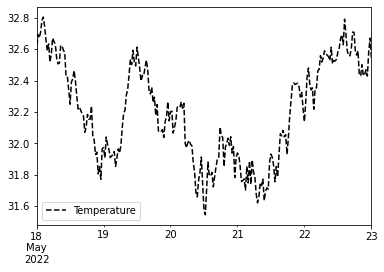

In [3]:
num_points = 300
window=50

data = np.random.normal(loc=32.0, scale=3.0, size=(num_points,))
data = np.convolve(data, np.ones(window)/window, mode='valid')
ts = pd.DataFrame(data, index=pd.date_range(start='18/5/2022', end='23/5/2022', periods=data.size))
ts.columns = ['Temperature']

ts.plot(style='k--')
plt.show()

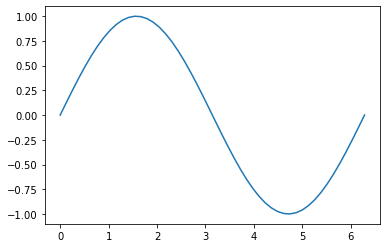

In [6]:
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)

plt.plot(x, y)
plt.show()

1: 0:00:00.089793
2: 0:00:00.082779
3: 0:00:00.083285
4: 0:00:00.183366
5: 0:00:00.087745
6: 0:00:00.095781
7: 0:00:00.086835
8: 0:00:00.084737
9: 0:00:00.201914
10: 0:00:00.084774


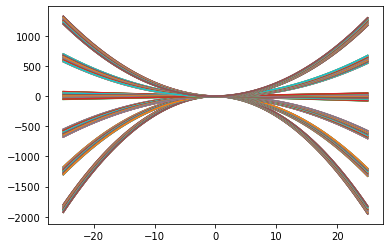

In [31]:
num_points = 100
x = np.linspace(-25, 25, num_points)
values = list(range(-3, 3))
polynom = lambda x, a, b, c: a * x**2 + b * x + c

history = []
for i in range(10):
    plt.clf()
    start = datetime.now()

    params = list(product(values, values, values))
    [plt.plot(x, polynom(x, *p)) for p in params]

    delta = datetime.now() - start
    history.append(delta)
    print(f'{i+1}: {delta}')
   




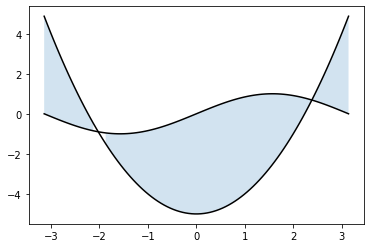

In [47]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = x**2 -5
mask = np.ones((100,))
mask[17:20] = 0

plt.fill_between(x, y1, y2, where=mask, interpolate=False, alpha=0.2)
plt.plot(x, y1, 'k')
plt.plot(x, y2, 'k')
plt.show()

In [66]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
y = np.sin(x**3 / 2)

plt.figure(dpi=1200)
plt.rcParams["axes.axisbelow"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(x, y, linewidth=1)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.xticks([-2*np.pi, -np.pi, np.pi, 2*np.pi],
          [ r'$-2\pi$', r'$-\pi$', r'$\pi$', r'$2\pi$'], fontsize=14)
plt.yticks([-1, -0.5, 0.5, 1], fontsize=14)

plt.show()

[<matplotlib.lines.Line2D object at 0x0000024D83DF9820>, <matplotlib.lines.Line2D object at 0x0000024D81F84730>, <matplotlib.lines.Line2D object at 0x0000024DA9BFF580>, <matplotlib.lines.Line2D object at 0x0000024DA9D150A0>]
['SinH', 'CosH', 'Sin', 'Cos']
[None, None]


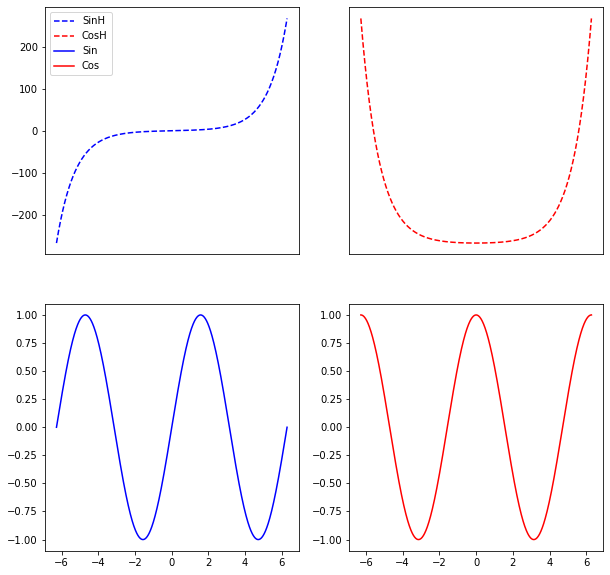

In [82]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2,2)

a1 = fig.add_subplot(gs[0,0])
a1.plot(x, np.sinh(x), 'b--', label='SinH')
a1.set_xticks([])

a2 = fig.add_subplot(gs[0,1])
a2.plot(x, np.cosh(x), 'r--', label='CosH')
a2.set_xticks([])
a2.set_yticks([])

a3 = fig.add_subplot(gs[1,0])
a3.plot(x, np.sin(x), 'b', label='Sin')

a4 = fig.add_subplot(gs[1,1])
a4.plot(x, np.cos(x), 'r', label='Cos')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
a1.legend(lines, labels, loc='upper left')

plt.show()